(1843, 1569, 2)
(1843, 1569, 1)


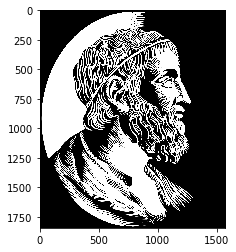

In [9]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import scipy.ndimage.filters
from matplotlib import pyplot as plt

arr = np.random.randint(0,256, 100*100) #example of a 1-D array
arr.resize((100,100))
im = Image.fromarray(arr, mode='L')
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)

A = np.zeros((5,5))

A[2,2] = 1
im = Image.open('images/ime.png')
#im.putalpha(255)

m = np.array(im)
print (m.shape)
#m = np.delete(m,0, 2)
m = np.delete(m,1, 2)
print (m.shape)
w = m.shape[0]
h = m.shape[1]
m = m.reshape(w,h)
plt.imshow(m, cmap='gray', vmin=0, vmax=255)




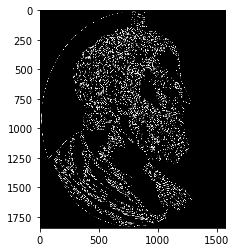

In [10]:
laplacian = scipy.ndimage.filters.laplace(m)
plt.imshow(laplacian, cmap='gray', vmin=0, vmax=255)


In [44]:
def sum_axis(laplacian):
    sumR = []
    total = 0
    check = 0
    i = 0
    for row in laplacian:
        for pixel in row:
            total += pixel
        
    for row in laplacian:
        sumR.append(0)
        for pixel in row:
            check += pixel/total
            sumR[i] += pixel/total
        i+=1

    print (total)
    print (sumR[599:609])
    print (check)
    return sumR

In [49]:
def min_range95(sumV,w):
    sumByPos = []
    resRange = []
    for i in range(w):
        sumByPos.append(0)
        resRange.append(w+1)
        for j in range(i,w):
            sumByPos[i] += sumV[j]
            if sumByPos[i] > 0.95:
                resRange[i] = j -i
                break
    x = min(resRange)
    print ("MIN:", x)
    print ("Feature:", x/w)
    return x/w

In [53]:
sumCollumns = sum_axis(laplacian)
sumRows = sum_axis(laplacian.T)

49252096
[0.0006986098622076914, 0.0007834387393381191, 0.0008429082896289331, 0.0008179753405824602, 0.0007331261597475975, 0.0006936151509166231, 0.0007085383736765235, 0.0007481102936208041, 0.000672377476077363, 0.0006699410315451344]
0.9999999999998653
49252096
[0.0012042939248717447, 0.0012212881254840399, 0.0011613515899912164, 0.0010864918317384908, 0.0010342910076354922, 0.0010090738067269265, 0.0011776554646527138, 0.0012428303558898288, 0.001196152139393215, 0.0010839741723885213]
0.9999999999998791


In [54]:
f1 = min_range95(sumCollumns,w)
f2 = min_range95(sumRows,h)
print(f1)
print(f2)

MIN: 1560
Feature: 0.8464460119370592
MIN: 966
Feature: 0.615678776290631
0.8464460119370592
0.615678776290631


(670, 1184, 1)
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1. -4.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


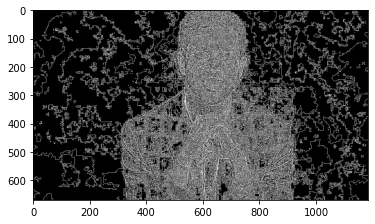

In [ ]:

im = Image.open('portrait2.jpg')
#im.putalpha(255)

m = np.array(im)

m = np.delete(m,1, 2)
m = np.delete(m,1, 2)
print (m.shape)
size = (m.shape[0],m.shape[1])
m = m.reshape(size[0],size[1])
plt.imshow(m, cmap='gray', vmin=0, vmax=255)
B = scipy.ndimage.filters.laplace(A)
print (B)
B = scipy.ndimage.filters.laplace(m)
plt.imshow(B, cmap='gray', vmin=0, vmax=255)

In [ ]:
B = B.T
sumR = []
total = 0
i = 0
for row in B:
  for pixel in row:
    total += pixel

for row in B:
  sumR.append(0)
  for pixel in row:
    sumR[i] += pixel/total
  i+=1
print (total)
print (sumR[600:660])

NameError: ignored

In [ ]:
f = []
res = []
for i in range(size[1]):
  f.append(0)
  res.append(10000)
  for j in range(i,size[1]):
    f[i] += sumR[j]
    if f[i] > 0.90:
      res[i] = j - i
      break
print (res)
print ("MIN:", min(res))
print ("Feature:", min(res)/size[1])

NameError: ignored